##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [57]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")
voters

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [58]:
#The purpose of my project is to analyze the trends in voter registration
#The goal is to see how it changes over time, looking both nationwide and in one state (I chose to look at California)
# It's important to read this notebook, because it will show us how events,
# like elections or certain policies being passed, impact voter registration. The data can also be used to improve voter outreach.


# Question 1: Nationally, did voter registration numbers change from 2016 to 2020?
# Question 2: In California, what month normally gives the smallest voter registration numbers?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [59]:
voters.head(5)
# "Jurisdiction" are the US states
# "Year" is the year in which the voter registration is being recorded
# "Month" is the month in which the voter registration is being recorded
# "New registered voters" is how many new voters were registered in the jurisdiction in that month of that year

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [60]:
voters.isna().sum()
#There does not appear to be any missing data in any column

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [61]:
#Check data types
print(voters.dtypes)
#Renaming columns
voters = voters.rename(columns={"Jurisdiction": "NAME", "New registered voters": "registered_voters"})
voters

Jurisdiction             object
Year                      int64
Month                    object
New registered voters     int64
dtype: object


,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

In [62]:
# It doesn't show the voter turnout data, only registration. Just because you are registered doesn't mean you vote
# States could collect the data differently

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [63]:
highest_votereg = voters.sort_values(by="registered_voters", ascending=False).head(1)
highest_votereg
#The highest amount of new voter registration was February 2020 in California, with 23,821 new voters registered

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [64]:
avg_votreg = voters["registered_voters"].mean()
avg_votreg
#The average voter registration, rounded to the nearest number, would be 48,223

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [65]:
high_voters = voters[voters["registered_voters"] > avg_votreg]
high_voters.head()
# Voter registration was higher than average 9 times

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377


How many times did each state go above the national average for new voter registration? (2 points)



In [66]:
state_high_votes = high_voters["NAME"].value_counts()
state_high_votes

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [67]:
state_avg_votreg = voters.groupby("NAME")["registered_voters"].mean()
top_avgstates = state_avg_votreg.sort_values(ascending=False).head(3)
top_avgstates

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

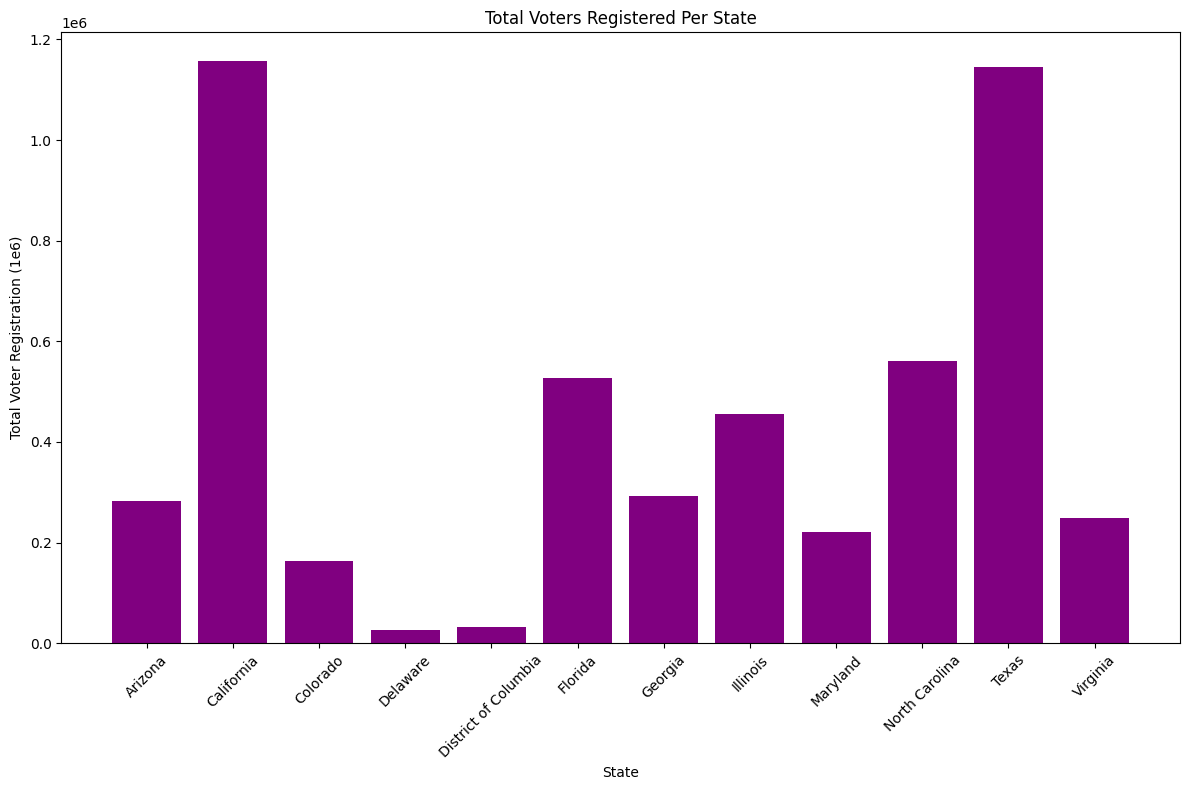

In [68]:
# Aggregate total registered voters per state from the voters dataset
state_votreg_total = voters.groupby("NAME")["registered_voters"].sum().reset_index()

# Create the plot
plt.figure(figsize=(12,8))
plt.bar(state_votreg_total["NAME"], state_votreg_total["registered_voters"], color="purple")

# Add labels and title
plt.xlabel("State")
plt.ylabel("Total Voter Registration (1e6)")
plt.title("Total Voters Registered Per State")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#The vertical axis shortened the numerical values to 1e6 which means the values are all in millions
# For example, the 1.2 on the top is actually 1.2 million

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

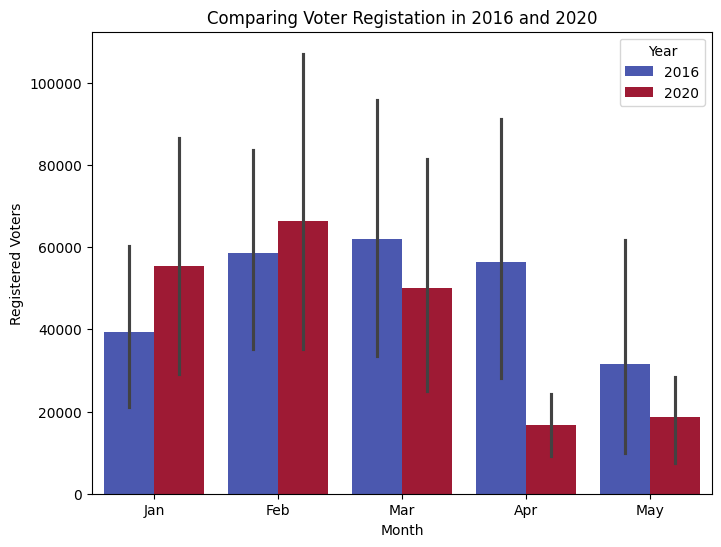

In [69]:
vote_compare = voters[voters["Year"].isin([2016, 2020])]
plt.figure(figsize=(8,6))
sns.barplot(data=vote_compare, x="Month", y="registered_voters", hue="Year", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Registered Voters")
plt.title("Comparing Voter Registation in 2016 and 2020")
plt.show()

#New voter registration was higher in 2016 than 2020 for all months listed, except for January and February
# In 2016, new voter registration was highest in March. In 2020, it was highest in February.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

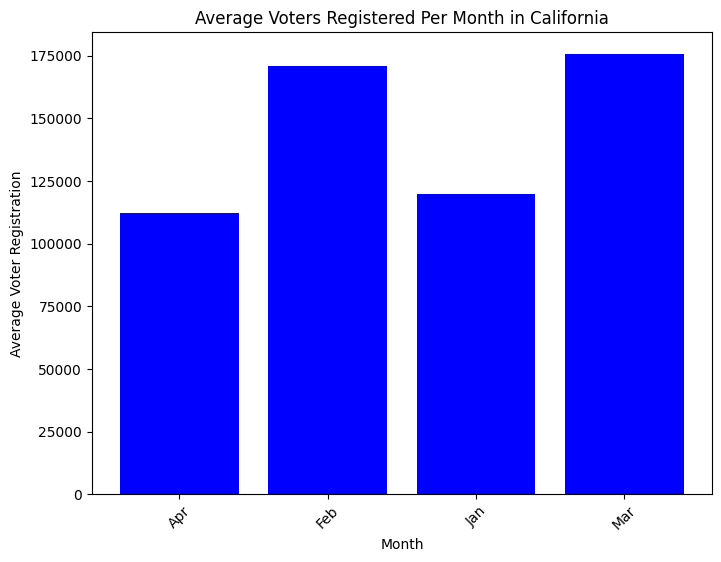

In [70]:
#Here I am answering my state level research question:
# In California, what month normally gives the smallest voter registration numbers?

cali_votreg = voters[voters["NAME"] == "California"]
cali_votreg_monthly = cali_votreg.groupby("Month")["registered_voters"].mean().reset_index()

plt.figure(figsize=(8,6))

plt.bar(cali_votreg_monthly["Month"], cali_votreg_monthly["registered_voters"], color="blue")
plt.xlabel("Month")
plt.ylabel("Average Voter Registration")
plt.title("Average Voters Registered Per Month in California")
plt.xticks(rotation=45)

plt.show()

#As we can see, January normally has the lowest voter registration numbers in California.

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [71]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


Set our continental US bounding box to us for the next questions. (2 points)

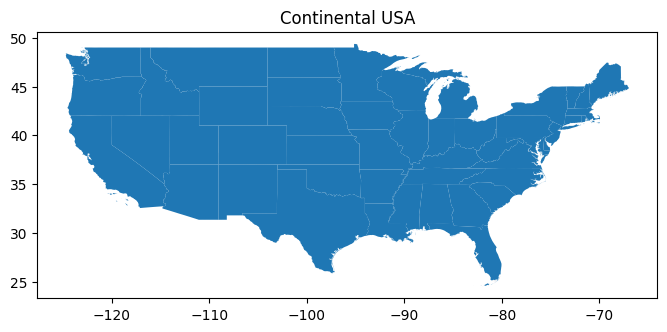

In [72]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

#I get these numbers from the "Mapping in Geopandas" notebook
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

us.plot(figsize=(8, 6))
plt.title("Continental USA")
plt.show()

Create a dataframe that shows the average voter registration per state. (2 points)

In [73]:
avg_votreg_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()
avg_votreg_state

,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [74]:
votereg_usmap = us.merge(avg_votreg_state, on="NAME", how="inner")
votereg_usmap

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

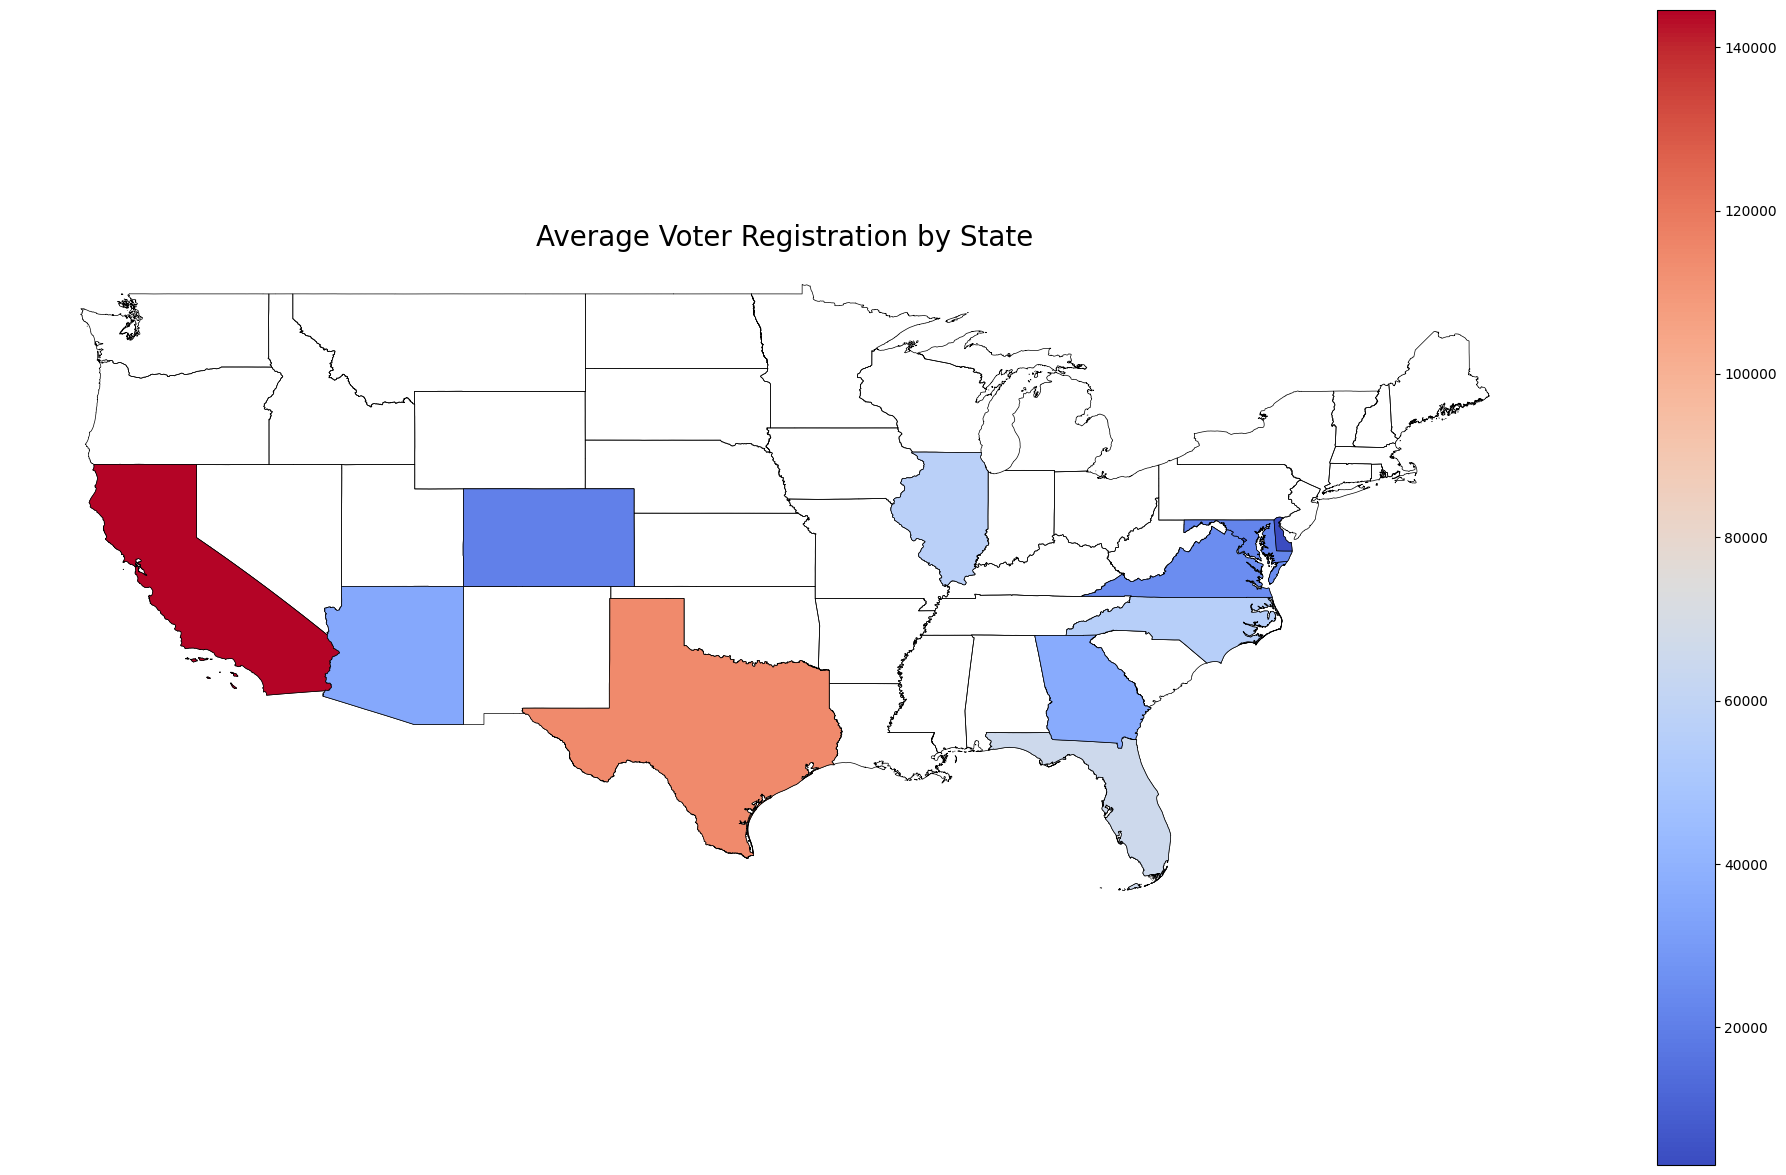

In [92]:
fig, ax = plt.subplots(figsize=(25, 15))

minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
us = states.cx[minx:maxx, miny:maxy]

# Boundary map of continental US data
us.plot(ax=ax, edgecolor="black", linewidth=0.5, facecolor="none")

# State that we have vote reg data on highlighted
votereg_usmap.plot(ax=ax, column="registered_voters", cmap="coolwarm", linewidth=0.5, edgecolor="black", legend=True)

plt.title("Average Voter Registration by State", size=20)
plt.axis("off")
plt.show()


##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In [ ]:
#Insights:
# States with larger populations, such as California and Texas, have the highest voter registration numbers.
#Some states have registration that is lower than expected, and this could indicate some barriers to voting.
#These differences could be due to many factors, which are worth looking into.

#Suggestions:
# We should look into why some states have lower than expected registration. It would be useful to look into why some states have lower voter registration.
# For this, we should look at laws and voting accessibility, and outreach.
# We can also compare voter registration to actual voter turnout. As I mentioned before, just because someone is registered doesn't mean they vote.

#Possible next steps:
# We can add data like voter turnout or demographics.
# We can also look at registration numbers over a greater amount of time, so we can see if outreach is effective.
# In particular, comparing states that have similar populations but different registration numbers would help us determine the most influential factors.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
#Joseph Fleishman